In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [23]:
crime_df = pd.read_csv("Resources_crime_data.csv")
crime_df.head()

,year,population,violent crime,violent crime rate,murder and non-negligent manslaughter,murder and non-negligent manslaughter rate,rape,rape rate,robbery,robbery rate,aggravated assault,aggravated assault rate,property crime,property crime rate,burglary,burglary rate,larceny-theft,larceny-theft rate,motor vehicle theft,motor vehicle theft rate
0,1994.0,260327021.0,1857670.0,713.6,23326.0,9.0,102216.0,39.3,618949.0,237.8,1113179.0,427.6,12131873.0,4660.2,2712774.0,1042.1,7879812.0,3026.9,1539287.0,591.3
1,1995.0,262803276.0,1798792.0,684.5,21606.0,8.2,97470.0,37.1,580509.0,220.9,1099207.0,418.3,12063935.0,4590.5,2593784.0,987.0,7997710.0,3043.2,1472441.0,560.3
2,1996.0,265228572.0,1688540.0,636.6,19645.0,7.4,96252.0,36.3,535594.0,201.9,1037049.0,391.0,11805323.0,4451.0,2506400.0,945.0,7904685.0,2980.3,1394238.0,525.7
3,1997.0,267783607.0,1636096.0,611.0,18208.0,6.8,96153.0,35.9,498534.0,186.2,1023201.0,382.1,11558475.0,4316.3,2460526.0,918.8,7743760.0,2891.8,1354189.0,505.7
4,1998.0,270248003.0,1533887.0,567.6,16974.0,6.3,93144.0,34.5,447186.0,165.5,976583.0,361.4,10951827.0,4052.5,2332735.0,863.2,7376311.0,2729.5,1242781.0,459.9


In [22]:
year_crime = crime_df.iloc[0:len(crime_df),0]
year_crime

0     1994.0
1     1995.0
2     1996.0
3     1997.0
4     1998.0
5     1999.0
6     2000.0
7     2001.0
8     2002.0
9     2003.0
10    2004.0
11    2005.0
12    2006.0
13    2007.0
14    2008.0
15    2009.0
16    2010.0
17    2011.0
18    2012.0
19    2013.0
Name: year, dtype: float64

In [25]:
viole_crime_rate = crime_df.iloc[0:len(crime_df),3]
viole_crime_rate

0     713.6
1     684.5
2     636.6
3     611.0
4     567.6
5     523.0
6     506.5
7     504.5
8     494.4
9     475.8
10    463.2
11    469.0
12    479.3
13    471.8
14    458.6
15    431.9
16    404.5
17    387.1
18    387.8
19    367.9
Name: violent crime rate, dtype: float64

In [26]:
murder_rate = crime_df.iloc[0:len(crime_df),5]
murder_rate

0     9.0
1     8.2
2     7.4
3     6.8
4     6.3
5     5.7
6     5.5
7     5.6
8     5.6
9     5.7
10    5.5
11    5.6
12    5.8
13    5.7
14    5.4
15    5.0
16    4.8
17    4.7
18    4.7
19    4.5
Name:  murder and non-negligent manslaughter rate, dtype: float64

In [27]:
agraved_assault_rate = crime_df.iloc[0:len(crime_df),11]
agraved_assault_rate

0     427.6
1     418.3
2     391.0
3     382.1
4     361.4
5     334.3
6     324.0
7     318.6
8     309.5
9     295.4
10    288.6
11    290.8
12    292.0
13    287.2
14    277.5
15    264.7
16    252.8
17    241.5
18    242.8
19    229.1
Name: aggravated assault rate, dtype: float64

In [32]:
vc_slope, vc_intercept, vc_r_value, vc_p_value, vc_std_err = stats.linregress(year_crime, viole_crime_rate)
vc_fit = vc_slope * year_crime + vc_intercept

In [33]:
mur_slope, mur_intercept, mur_r_value, mur_p_value, mur_std_err = stats.linregress(year_crime, murder_rate)
mur_fit = mur_slope * year_crime + mur_intercept

In [34]:
ag_ass_slope, ag_ass_intercept, ag_ass_r_value, ag_ass_p_value, ag_ass_std_err = stats.linregress(year_crime, agraved_assault_rate)
ag_ass_fit = ag_ass_slope * year_crime + ag_ass_intercept

<IPython.core.display.Javascript object>


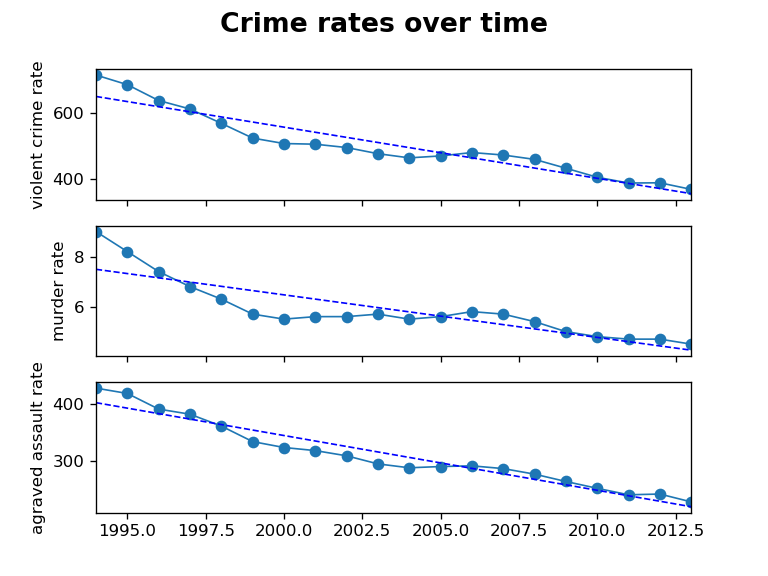

Text(0, 0.5, 'agraved assault rate')

In [37]:
#Plot
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Crime rates over time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year_crime),max(year_crime))
ax1.plot(year_crime, viole_crime_rate, linewidth=1, marker="o")
ax1.plot(year_crime, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("violent crime rate")

ax2.set_xlim(min(year_crime),max(year_crime))
ax2.plot(year_crime, murder_rate, linewidth=1, marker="o")
ax2.plot(year_crime, mur_fit, "b--", linewidth=1)
ax2.set_ylabel("murder rate")

ax3.set_xlim(min(year_crime),max(year_crime))
ax3.plot(year_crime, agraved_assault_rate, linewidth=1, marker="o")
ax3.plot(year_crime, ag_ass_fit, "b--", linewidth=1)
ax3.set_ylabel("agraved assault rate")